<a href="https://colab.research.google.com/github/LimJavier/Weatherwise-Javier-Lim/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'https://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 71f0222d3be04e5084fdf890ecee4e28.spCIJMbYVjy7q_m7T9ATSbTW


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here
import time
import fetch_my_weather
import hands_on_ai
import re
import logging
from datetime import datetime, timedelta
from typing import Dict, Any, Optional, List

# Try to import ipywidgets for Jupyter/interactive mode
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output, HTML
    JUPYTER_AVAILABLE = True
except ImportError:
    JUPYTER_AVAILABLE = False
    print("⚠️  ipywidgets not available. Interactive mode disabled.")

# Set up logging
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

## 🌤️ Weather Data Functions

In [4]:
# Define get_weather_data() function here
def get_weather_data(location, units="metric", forecast_days=0, max_retries=3):
    """
    Retrieve weather data for a specified location with optional forecast days.

    Args:
        location (str): City name (e.g., "Perth") or "City,Country" (e.g., "Perth,AU").
        units (str): "metric" (°C) or "imperial" (°F). Default is "metric".
        forecast_days (int): Number of days to forecast (0 = current weather only). Max = 5.
        max_retries (int): Number of retry attempts for connection errors. Default = 3.

    Returns:
        dict: Structured weather information including:
            - location: Verified location name and country
            - current: Current weather data (temperature, humidity, description, wind speed)
            - forecast: List of daily forecasts (if forecast_days > 0)
            - summary: Human-readable weather summary

    Raises:
        ValueError: Invalid parameters, location, or API key.
        ConnectionError: Unable to connect after retries.
    """

    API_KEY = "16d5a3f7e99677a7415465b4d0268f45"
    CURRENT_URL = "https://api.openweathermap.org/data/2.5/weather"
    FORECAST_URL = "https://api.openweathermap.org/data/2.5/forecast"

    def request_with_retries(url, params, retries=max_retries):
        """Helper: Retry request if connection fails."""
        attempt = 0
        while attempt < retries:
            try:
                response = requests.get(url, params=params, timeout=10)
                if response.status_code == 401:
                    raise ValueError("Invalid API key. Please check your OpenWeatherMap API key.")
                if response.status_code == 404:
                    raise ValueError(f"Location '{location}' not found. Please check the location name.")
                response.raise_for_status()
                return response.json()
            except requests.exceptions.RequestException as e:
                attempt += 1
                if attempt >= retries:
                    raise ConnectionError(f"Failed to connect after {retries} attempts: {e}")
                print(f"[Warning] Attempt {attempt} failed: {e}. Retrying...")
                time.sleep(2)

    # Validate forecast_days parameter
    if not isinstance(forecast_days, int) or forecast_days < 0 or forecast_days > 5:
        raise ValueError("forecast_days must be an integer between 0 and 5.")

    # Fetch current weather
    params = {"q": location, "appid": API_KEY, "units": units}
    current_data = request_with_retries(CURRENT_URL, params)

    if current_data.get("cod") != 200:
        error_message = current_data.get("message", "Unknown error")
        if "invalid api key" in error_message.lower():
            raise ValueError("Invalid API key. Please check your API key in OpenWeatherMap.")
        elif "city not found" in error_message.lower():
            raise ValueError(f"Location '{location}' not found. Please check the spelling.")
        else:
            raise ValueError(f"Error from API: {error_message}")

    current_weather = {
        "temperature": current_data["main"]["temp"],
        "humidity": current_data["main"]["humidity"],
        "description": current_data["weather"][0]["description"].capitalize(),
        "wind_speed": current_data["wind"]["speed"],
        "precipitation": 0  # Default for current weather
    }

    weather_output = {
        "location": f"{current_data.get('name')}, {current_data.get('sys', {}).get('country')}",
        "current": current_weather,
        "forecast": [],
        "summary": f"Current weather in {current_data.get('name')}: {current_weather['description']}, "
                   f"{current_weather['temperature']}° with {current_weather['humidity']}% humidity."
    }

    # Fetch forecast if requested
    if forecast_days > 0:
        forecast_params = {"q": location, "appid": API_KEY, "units": units}
        forecast_data = request_with_retries(FORECAST_URL, forecast_params)

        if forecast_data.get("cod") != "200":
            error_message = forecast_data.get("message", "Unknown error")
            raise ValueError(f"Forecast error: {error_message}")

        daily_forecast = {}
        for entry in forecast_data["list"]:
            date = entry["dt_txt"].split(" ")[0]

            # Extract precipitation data (rain and snow)
            rain = entry.get("rain", {}).get("3h", 0)  # Rain volume for last 3 hours
            snow = entry.get("snow", {}).get("3h", 0)  # Snow volume for last 3 hours
            precipitation = rain + snow  # Total precipitation

            if date not in daily_forecast:
                daily_forecast[date] = {
                    "temperature_min": entry["main"]["temp_min"],
                    "temperature_max": entry["main"]["temp_max"],
                    "description": entry["weather"][0]["description"].capitalize(),
                    "precipitation": precipitation,
                    "entries": 1  # Count entries for averaging
                }
            else:
                daily_forecast[date]["temperature_min"] = min(daily_forecast[date]["temperature_min"], entry["main"]["temp_min"])
                daily_forecast[date]["temperature_max"] = max(daily_forecast[date]["temperature_max"], entry["main"]["temp_max"])
                daily_forecast[date]["precipitation"] += precipitation
                daily_forecast[date]["entries"] += 1

        # Calculate average precipitation per day and create forecast list
        sorted_dates = sorted(daily_forecast.keys())
        weather_output["forecast"] = []

        for date in sorted_dates[:forecast_days]:
            day_data = daily_forecast[date]
            # Calculate average precipitation (convert from 3h to daily if needed)
            avg_precipitation = day_data["precipitation"] / day_data["entries"] * 8  # Approximate daily total

            weather_output["forecast"].append({
                "date": date,
                "temperature_min": day_data["temperature_min"],
                "temperature_max": day_data["temperature_max"],
                "description": day_data["description"],
                "precipitation": round(avg_precipitation, 1)  # Rounded to 1 decimal
            })

        weather_output["summary"] += f" Forecast available for next {forecast_days} day(s)."

    return weather_output

# Testing for weather data retrieval
try:
    weather = get_weather_data("Malaysia", units="metric", forecast_days=5)
    print(weather["summary"])
    print("Current:", weather["current"])
    if weather["forecast"]:
        print("Forecast:")
        for day in weather["forecast"]:
            print(day)
except ValueError as ve:
    print(f"[ValueError] {ve}")
except ConnectionError as ce:
    print(f"[ConnectionError] {ce}")
except Exception as e:
    print(f"[Error] {e}")

Current weather in Malaysia: Overcast clouds, 21.13° with 99% humidity. Forecast available for next 5 day(s).
Current: {'temperature': 21.13, 'humidity': 99, 'description': 'Overcast clouds', 'wind_speed': 0.79, 'precipitation': 0}
Forecast:
{'date': '2025-10-17', 'temperature_min': 20.68, 'temperature_max': 21.16, 'description': 'Overcast clouds', 'precipitation': 0.0}
{'date': '2025-10-18', 'temperature_min': 20.84, 'temperature_max': 31.02, 'description': 'Overcast clouds', 'precipitation': 3.5}
{'date': '2025-10-19', 'temperature_min': 21.2, 'temperature_max': 29.94, 'description': 'Broken clouds', 'precipitation': 1.2}
{'date': '2025-10-20', 'temperature_min': 21.23, 'temperature_max': 30.5, 'description': 'Light rain', 'precipitation': 6.7}
{'date': '2025-10-21', 'temperature_min': 20.91, 'temperature_max': 29.93, 'description': 'Light rain', 'precipitation': 8.8}


## 📊 Visualisation Functions

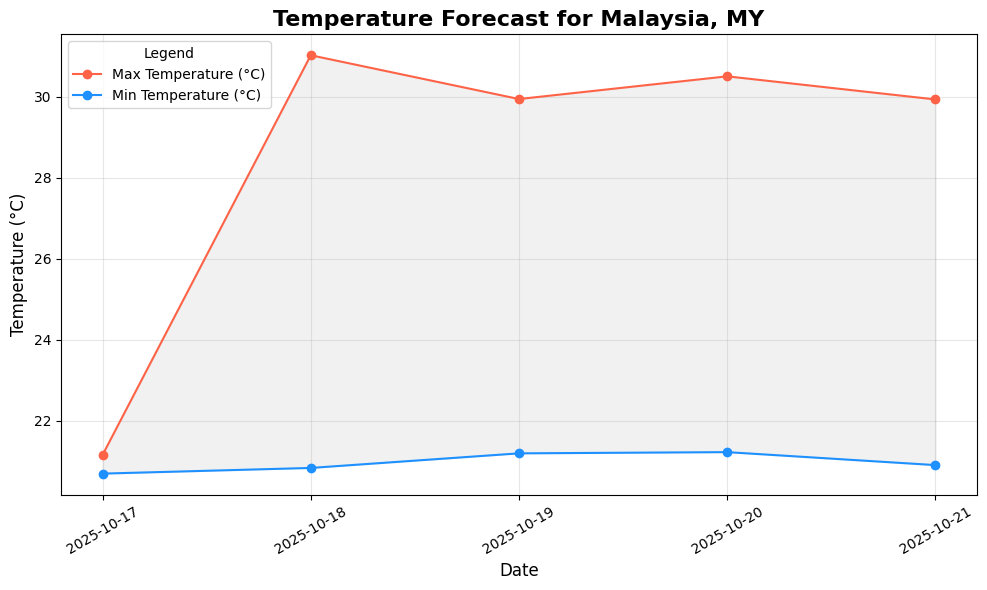

In [13]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a temperature trend visualisation from processed weather forecast data.

    Purpose:
        To plot the minimum and maximum temperature trends for a location over forecast days,
        enhancing data readability for analysis or reporting.

    Args:
        weather_data (dict): Processed weather data containing:
            - location (str): Location name (e.g., "Perth, AU").
            - forecast (list of dict): Forecast list with each entry containing:
                * 'date' (str): Date in YYYY-MM-DD format.
                * 'temperature_min' (float): Minimum temperature for the day.
                * 'temperature_max' (float): Maximum temperature for the day.
        output_type (str): Determines output behaviour:
            - 'display': Display the chart directly.
            - 'return': Return the Matplotlib figure object for further use.

    Returns:
        matplotlib.figure.Figure or None:
            - Returns the figure object if output_type='return'.
            - Returns None if output_type='display'.
    Raises:
        ValueError: If forecast data is missing or incomplete.
        TypeError: If input data format is incorrect.
    """

    # Validate forecast data
    if not weather_data or "forecast" not in weather_data:
        raise ValueError("Missing weather forecast data.")

    forecast = weather_data["forecast"]
    if not isinstance(forecast, list) or len(forecast) == 0:
        raise ValueError("Forecast data must be a non-empty list.")

    # Extract dates and temperatures with error handling
    dates = []
    temp_min = []
    temp_max = []
    for entry in forecast:
        try:
            dates.append(entry["date"])
            temp_min.append(float(entry["temperature_min"]))
            temp_max.append(float(entry["temperature_max"]))
        except (KeyError, TypeError, ValueError):
            raise ValueError("Forecast entries must contain valid 'date', 'temperature_min', and 'temperature_max'.")

    # Check for extreme or missing values
    if any(t is None for t in temp_min + temp_max):
        raise ValueError("Temperature data contains None values.")
    if any(abs(t) > 100 for t in temp_min + temp_max):  # Extreme check
        raise ValueError("Temperature data contains unrealistic values.")

    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(dates, temp_max, label="Max Temperature (°C)", color="tomato", marker="o")
    ax.plot(dates, temp_min, label="Min Temperature (°C)", color="dodgerblue", marker="o")
    ax.fill_between(dates, temp_min, temp_max, color="lightgray", alpha=0.3)

    # Improve readability
    ax.set_title(f"Temperature Forecast for {weather_data.get('location', 'Unknown Location')}", fontsize=16, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Temperature (°C)", fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.3)
    ax.legend(title="Legend", fontsize=10)

    plt.tight_layout()

    # Display or return figure
    if output_type == 'display':
        plt.show()
        return None
    elif output_type == 'return':
        return fig
    else:
        raise ValueError("Invalid output_type. Use 'display' or 'return'.")

# Testing for temperature visualisation
weather_data = get_weather_data(location="Malaysia", forecast_days=5)
create_temperature_visualisation(weather_data, output_type="display")


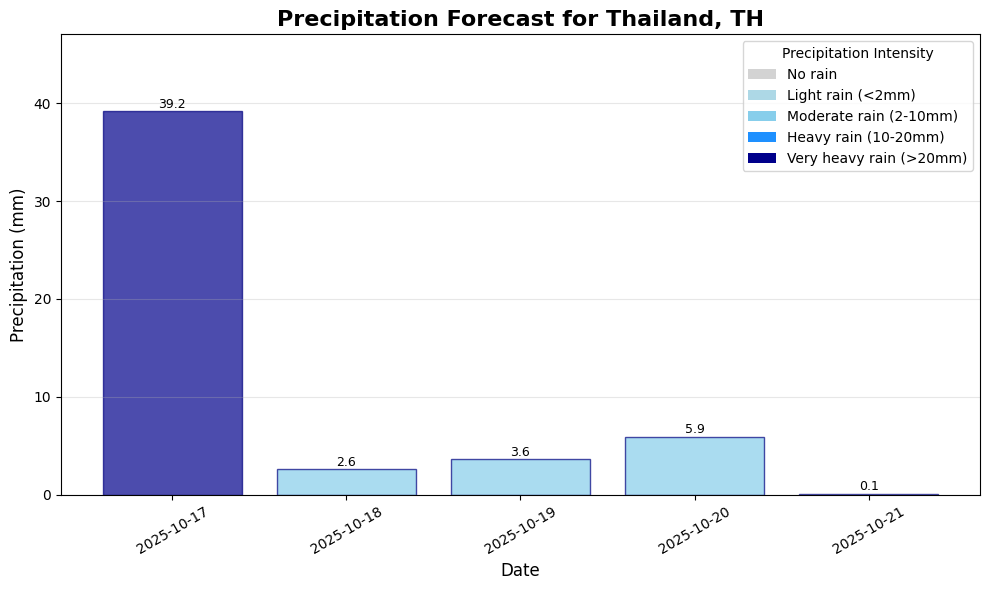

In [22]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a precipitation trend visualisation from processed weather forecast data.

    Purpose:
        To plot daily precipitation trends for a location over forecast days,
        making precipitation patterns easy to interpret.

    Args:
        weather_data (dict): Processed weather data containing:
            - location (str): Location name (e.g., "Perth, AU").
            - forecast (list of dict): Forecast list with each entry containing:
                * 'date' (str): Date in YYYY-MM-DD format.
                * 'precipitation' (float): Precipitation in millimeters for the day.
        output_type (str): Determines output behaviour:
            - 'display': Display the chart directly.
            - 'return': Return the Matplotlib figure object for further use.

    Returns:
        matplotlib.figure.Figure or None:
            - Returns the figure object if output_type='return'.
            - Returns None if output_type='display'.

    Raises:
        ValueError: If forecast data is missing or incomplete.
        TypeError: If input data format is incorrect.
    """

    # Validate forecast data
    if not weather_data or "forecast" not in weather_data:
        raise ValueError("Missing weather forecast data.")

    forecast = weather_data["forecast"]
    if not isinstance(forecast, list) or len(forecast) == 0:
        raise ValueError("Forecast data must be a non-empty list.")

    # Extract dates and precipitation values
    dates = []
    precipitation = []
    for entry in weather_data["forecast"]:  # Use weather_data directly
        try:
            dates.append(entry["date"])
            # Use actual precipitation data, default to 0 if missing
            precip_value = entry.get("precipitation", 0)
            if precip_value is None:
                precip_value = 0
            precipitation.append(float(precip_value))
        except (KeyError, TypeError, ValueError) as e:
            print(f"Warning: Invalid precipitation data for {entry.get('date')}: {e}")
            precipitation.append(0.0)

    # Check if we have any meaningful precipitation data
    total_precipitation = sum(precipitation)

    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create colored bars based on precipitation intensity
    colors = []
    for precip in precipitation:
        if precip == 0:
            colors.append('lightgray')
        elif precip < 2:
            colors.append('lightblue')
        elif precip < 10:
            colors.append('skyblue')
        elif precip < 20:
            colors.append('dodgerblue')
        else:
            colors.append('darkblue')

    bars = ax.bar(dates, precipitation, color=colors, alpha=0.7,
                  edgecolor='navy', linewidth=1, label="Precipitation (mm)")

    # Add value labels on bars
    for bar, precip in zip(bars, precipitation):
        if precip > 0:  # Only label bars with actual precipitation
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                   f'{precip:.1f}', ha='center', va='bottom', fontsize=9)

    # Improve readability
    location = weather_data.get('location', 'Unknown Location')
    ax.set_title(f"Precipitation Forecast for {location}", fontsize=16, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Precipitation (mm)", fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.3, axis='y')

    # Add legend for precipitation intensity
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgray', label='No rain'),
        Patch(facecolor='lightblue', label='Light rain (<2mm)'),
        Patch(facecolor='skyblue', label='Moderate rain (2-10mm)'),
        Patch(facecolor='dodgerblue', label='Heavy rain (10-20mm)'),
        Patch(facecolor='darkblue', label='Very heavy rain (>20mm)')
    ]
    ax.legend(handles=legend_elements, title="Precipitation Intensity", loc='upper right')

    # Set y-axis to start from 0 with some headroom
    max_precip = max(precipitation) if precipitation else 5
    ax.set_ylim(0, max(10, max_precip * 1.2))

    plt.tight_layout()

    # Display or return figure
    if output_type == 'display':
        plt.show()
        return None
    elif output_type == 'return':
        return fig
    else:
        raise ValueError("Invalid output_type. Use 'display' or 'return'.")


def add_precipitation_estimation(weather_data):
    """
    ONLY use actual precipitation data from API.
    """
    if not weather_data.get('forecast'):
        return weather_data

    for day in weather_data['forecast']:
        # ONLY ensure existing precipitation is properly formatted
        if 'precipitation' in day:
            try:
                day['precipitation'] = float(day['precipitation'])
            except (TypeError, ValueError):
                day['precipitation'] = 0.0
        else:
            # If no precipitation data from API, set to 0 (not estimate)
            day['precipitation'] = 0.0

    return weather_data

# Testing for percipitation visualisation
weather_data = get_weather_data("Thailand", forecast_days=5)
create_precipitation_visualisation(weather_data, output_type="display")

## 🤖 Natural Language Processing

In [7]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question: Any, default_location: Optional[str] = None) -> Dict[str, Any]:
    """
    Parse a weather-related question and extract key information.

    Args:
        question: The user's weather question
        default_location: Default location to use if none is found

    Returns:
        Dictionary containing location, time_period, attribute, query_type, error, and confidence
    """
    # Initialize result structure with error field
    result = {
        "location": None,
        "time_period": None,
        "attribute": None,
        "query_type": None,
        "error": None,
        "confidence": "high"
    }

    try:
        # Step 1: Handle empty or invalid input
        if question is None:
            result["error"] = "Empty input: No question provided"
            return result

        if not isinstance(question, str):
            result["error"] = "Invalid input type: Question must be a string"
            return result

        # Step 2: Preprocess the question
        normalized_question = question.strip()

        if not normalized_question or len(normalized_question) < 3:
            result["error"] = "Invalid input: Question too short or empty"
            return result

        normalized_question = normalized_question.lower()

        # Step 3: Check if question is weather-related
        weather_indicators = [
            "weather", "rain", "temperature", "wind", "snow", "cloud",
            "sunny", "hot", "cold", "warm", "cool", "storm", "forecast",
            "humid", "fog", "drizzle", "precipitation", "degrees", "°c", "°f",
            "umbrella", "jacket", "coat", "freezing", "chilly", "heat"
        ]

        # Add common non-weather phrases to ignore
        non_weather_phrases = ["ok", "okay", "thanks", "thank you", "good", "nice", "great"]

        normalized_question = question.lower().strip()

        # Skip processing for common non-weather responses
        if any(phrase in normalized_question for phrase in non_weather_phrases):
            return {
                "location": None,
                "time_period": None,
                "attribute": None,
                "query_type": None,
                "error": "Not a weather question: Common response detected",
                "confidence": "low"
            }

        is_weather_related = any(indicator in normalized_question for indicator in weather_indicators)

        if not is_weather_related:
            result["error"] = "Not a weather question: Unable to identify weather-related keywords"
            result["confidence"] = "low"
            # Continue processing anyway

        # Step 4: Extract location with error handling
        try:
            # Try regex pattern for "in/at [Location]"
            location_pattern = r'\b(?:in|at)\s+([A-Z][a-zA-Z\s]+?)(?:\s|$|\?|,)'
            match = re.search(location_pattern, question)
            if match:
                result["location"] = match.group(1).strip()

            # Also try to find capitalized words that might be locations
            if result["location"] is None:
                # Look for capitalized words (likely place names)
                cap_pattern = r'\b([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\b'
                matches = re.findall(cap_pattern, question)
                if matches:
                    # Filter out common words that aren't locations
                    non_locations = {"Will", "What", "How", "When", "Where", "Is", "The", "A", "An"}
                    locations = [m for m in matches if m not in non_locations]
                    if locations:
                        result["location"] = locations[0]

        except Exception as e:
            logger.warning(f"Location extraction failed: {str(e)}")
            result["confidence"] = "medium"

        # Handle ambiguous or missing location
        if result["location"] is None:
            if default_location:
                result["location"] = default_location
                result["confidence"] = "medium"
            else:
                result["error"] = "Missing location: Unable to determine location from question"
                result["confidence"] = "low"

        # Step 5: Extract time period with error handling
        try:
            result["time_period"] = extract_time_period(normalized_question)

            # Handle ambiguous time references
            ambiguous_terms = ["soon", "later", "future", "past"]
            for term in ambiguous_terms:
                if term in normalized_question and result["time_period"] is None:
                    result["error"] = f"Ambiguous time reference: '{term}' is too vague"
                    result["confidence"] = "low"
                    break

            # Default to today if no time mentioned
            if result["time_period"] is None:
                result["time_period"] = datetime.now().strftime("%Y-%m-%d")
                result["confidence"] = "medium"

        except Exception as e:
            logger.warning(f"Time extraction failed: {str(e)}")
            result["time_period"] = datetime.now().strftime("%Y-%m-%d")
            result["confidence"] = "low"

        # Step 6: Extract weather attribute with validation
        try:
            attribute_keywords = {
                "rain": ["rain", "raining", "rainy", "precipitation", "drizzle", "shower"],
                "temperature": ["temperature", "hot", "cold", "warm", "cool", "degrees", "temp"],
                "wind": ["wind", "windy", "breeze", "gust"],
                "snow": ["snow", "snowing", "snowy", "sleet"],
                "clouds": ["cloud", "cloudy", "overcast", "sky"],
                "humidity": ["humid", "humidity", "moisture"],
                "sun": ["sun", "sunny", "sunshine", "clear"],
                "storm": ["storm", "stormy", "thunder", "lightning"],
                "fog": ["fog", "foggy", "mist", "misty"],
                "general": ["weather", "forecast", "conditions"]
            }

            matched_attributes = []
            for attribute, keywords in attribute_keywords.items():
                if any(keyword in normalized_question for keyword in keywords):
                    matched_attributes.append(attribute)

            # Handle multiple conflicting attributes (ambiguity)
            if len(matched_attributes) > 2:
                result["error"] = "Ambiguous question: Multiple weather attributes detected"
                result["attribute"] = matched_attributes[0]
                result["confidence"] = "low"
            elif len(matched_attributes) == 0:
                result["attribute"] = "general"
                if not is_weather_related:
                    result["confidence"] = "low"
            else:
                result["attribute"] = matched_attributes[0]

        except Exception as e:
            logger.warning(f"Attribute extraction failed: {str(e)}")
            result["attribute"] = "general"
            result["confidence"] = "low"

        # Step 7: Determine query type with error handling
        try:
            question_words = ["will", "is", "does", "can", "should"]
            wh_words = ["what", "how", "when", "where"]

            if any(word in normalized_question for word in question_words):
                result["query_type"] = "yes_no"
            elif any(word in normalized_question for word in wh_words):
                if any(phrase in normalized_question for phrase in ["how much", "how hot", "how cold"]):
                    result["query_type"] = "quantity"
                else:
                    result["query_type"] = "descriptive"
            else:
                result["query_type"] = "general"

        except Exception as e:
            logger.warning(f"Query type detection failed: {str(e)}")
            result["query_type"] = "general"

        # Step 8: Final validation
        if result["location"] is None and result["time_period"] is None and result["attribute"] is None:
            result["error"] = "Unable to extract any weather information from question"
            result["confidence"] = "low"

        return result

    except Exception as e:
        # Catch-all for unexpected errors
        logger.error(f"Unexpected error in parse_weather_question: {str(e)}")
        return {
            "location": None,
            "time_period": datetime.now().strftime("%Y-%m-%d"),
            "attribute": "general",
            "query_type": "general",
            "error": f"Processing error: {str(e)}",
            "confidence": "low"
        }


def extract_time_period(normalized_question: str) -> Optional[str]:
    """
    Extract time period from the question and return as a date string.

    Args:
        normalized_question: Lowercase question text

    Returns:
        Date string in YYYY-MM-DD format or None
    """
    today = datetime.now()

    # Direct day references
    if "today" in normalized_question:
        return today.strftime("%Y-%m-%d")
    elif "tomorrow" in normalized_question:
        return (today + timedelta(days=1)).strftime("%Y-%m-%d")
    elif "yesterday" in normalized_question:
        return (today - timedelta(days=1)).strftime("%Y-%m-%d")
    elif "tonight" in normalized_question:
        return today.strftime("%Y-%m-%d")

    # Week references
    if "next week" in normalized_question:
        return (today + timedelta(weeks=1)).strftime("%Y-%m-%d")
    elif "this week" in normalized_question:
        return today.strftime("%Y-%m-%d")

    # Weekend
    if "weekend" in normalized_question or "this weekend" in normalized_question:
        # Find next Saturday
        days_ahead = 5 - today.weekday()  # Saturday is 5
        if days_ahead <= 0:
            days_ahead += 7
        return (today + timedelta(days=days_ahead)).strftime("%Y-%m-%d")

    # Day of week
    days_of_week = {
        "monday": 0, "tuesday": 1, "wednesday": 2, "thursday": 3,
        "friday": 4, "saturday": 5, "sunday": 6
    }

    for day_name, day_num in days_of_week.items():
        if day_name in normalized_question:
            # Find next occurrence of this day
            current_day = today.weekday()
            days_ahead = day_num - current_day
            if days_ahead <= 0:  # Target day already happened this week
                days_ahead += 7
            return (today + timedelta(days=days_ahead)).strftime("%Y-%m-%d")

    # Time of day (return today's date with note)
    time_of_day = ["morning", "afternoon", "evening", "night"]
    for time in time_of_day:
        if time in normalized_question:
            return today.strftime("%Y-%m-%d")

    return None

# Example usage and testing
if __name__ == "__main__":
    test_questions = [
        "Will it rain tomorrow in Perth?",
        "What's the weather like in London today?",
        "How hot will it be next Monday?",
        "Is it going to snow this weekend?",
        "",  # Empty input
        123,  # Invalid type
        "What time is the meeting?",  # Not weather-related
        "Weather tomorrow",  # Missing location
        "Rain soon in Sydney",  # Ambiguous time
    ]

    print("=" * 80)
    print("WEATHER QUESTION PARSER - TEST RESULTS")
    print("=" * 80)

    for i, question in enumerate(test_questions, 1):
        print(f"\n{i}. Question: {repr(question)}")
        result = parse_weather_question(question, default_location="Perth")
        print(f"   Location: {result['location']}")
        print(f"   Time: {result['time_period']}")
        print(f"   Attribute: {result['attribute']}")
        print(f"   Query Type: {result['query_type']}")
        print(f"   Confidence: {result['confidence']}")
        if result['error']:
            print(f"   Error: {result['error']}")
        print("-" * 80)

WEATHER QUESTION PARSER - TEST RESULTS

1. Question: 'Will it rain tomorrow in Perth?'
   Location: Perth
   Time: 2025-10-18
   Attribute: rain
   Query Type: yes_no
   Confidence: high
--------------------------------------------------------------------------------

2. Question: "What's the weather like in London today?"
   Location: London
   Time: 2025-10-17
   Attribute: general
   Query Type: descriptive
   Confidence: high
--------------------------------------------------------------------------------

3. Question: 'How hot will it be next Monday?'
   Location: Monday
   Time: 2025-10-20
   Attribute: temperature
   Query Type: yes_no
   Confidence: high
--------------------------------------------------------------------------------

4. Question: 'Is it going to snow this weekend?'
   Location: Perth
   Time: 2025-10-17
   Attribute: snow
   Query Type: yes_no
   Confidence: medium
--------------------------------------------------------------------------------

5. Question: '

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

class WeatherConfig:
    """Configuration settings for the weather chatbot."""

    def __init__(self):
        self.default_location = "Perth"
        self.default_units = "metric"
        self.default_forecast_days = 5

        # Ollama settings
        self.ollama_model = os.getenv('HANDS_ON_AI_MODEL', 'granite3.2')
        self.ollama_host = os.getenv('HANDS_ON_AI_SERVER', 'http://ollama.serveur.au')
        self.ollama_api_key = os.getenv('HANDS_ON_AI_API_KEY')

        # Enable AI if API key is available
        self.use_ollama = bool(self.ollama_api_key)

        self.validate_ai_setup()

    def validate_ai_setup(self):
        """Validate AI configuration."""
        print("\n" + "="*50)
        print("🤖 AI CONFIGURATION CHECK")
        print("="*50)

        if self.ollama_api_key:
            print("✅ Ollama API key: Found")
            print(f"✅ Model: {self.ollama_model}")
            print(f"✅ Server: {self.ollama_host}")
            print("✅ AI integration: ENABLED")
        else:
            print("❌ Ollama API key: Not found")
            print("ℹ️  AI integration: DISABLED")
            print("💡 Set HANDS_ON_AI_API_KEY environment variable to enable AI")

        print("="*50 + "\n")


# ============================================================================
# CONSOLE MENU INTERFACE (pyinputplus)
# ============================================================================

class ConsoleWeatherUI:
    """Console-based weather chatbot interface using pyinputplus."""

    def __init__(self, config: WeatherConfig):
        self.config = config
        self.last_weather_data = None
        self.last_location = None
        self.session_history = []

    def show_banner(self):
        """Display welcome banner."""
        print("\n" + "=" * 80)
        print("🌤️  WEATHER CHATBOT - CONSOLE MODE")
        print("=" * 80)

        if self.config.use_ollama:
            print("Welcome! Your intelligent weather assistant powered by AI. 🤖")
        else:
            print("Welcome! Your reliable weather assistant.")

        print("=" * 80 + "\n")

    def show_main_menu(self):
        """Display main menu and get user choice."""
        print("\n📋 MAIN MENU")
        print("─" * 40)
        menu_options = [
            "1. 💬 Chat Mode (Ask natural language questions)",
            "2. 📊 Weather Dashboard (Quick access)",
            "3. 📈 View Visualizations (Charts)",
            "4. ⚙️  Settings",
            "5. 📚 Help",
            "6. 🚪 Exit"
        ]

        for option in menu_options:
            print(option)

        print("─" * 40)

        choice = pyip.inputMenu(
            ['1', '2', '3', '4', '5', '6'],
            prompt="\nSelect an option: ",
            numbered=False
        )

        return choice

    def chat_mode(self):
        """Interactive chat mode with better user guidance."""
        print("\n" + "=" * 80)
        print("💬 CHAT MODE")
        print("=" * 80)
        print("Ask me about the weather! Here are your options:")
        print("• Ask weather questions (e.g., 'temperature in Paris', 'will it rain tomorrow')")
        print("• Type 'chart' to see weather graphs")
        print("• Type 'help' for examples")
        print("• Type 'back' to return to main menu")
        print("• Type 'exit' to quit the application")
        print("=" * 80 + "\n")

        while True:
            try:
                # Get user question with better prompt
                question = pyip.inputStr(
                    "You (or type 'back' for menu): ",
                    blank=False,
                    strip=True
                )

                # Check for exit and commands
                if question.lower() in ['back', 'exit', 'quit', 'return']:
                    print("\n↩️  Returning to main menu...\n")
                    break

                if question.lower() == 'help':
                    self.show_chat_help()
                    continue

                if question.lower() in ['chart', 'graph', 'visualize']:
                    if self.last_weather_data:
                        self.show_visualizations()
                        print("\n📊 Charts displayed. Ask another question or type 'back' for menu.\n")
                    else:
                        print("Bot: Please ask a weather question first to load data!\n")
                    continue

                if question.lower() in ['menu', 'main menu']:
                    print("\n↩️  Returning to main menu...\n")
                    break

                # Process weather question
                print("\nBot: 🔍 Let me check that for you...\n")
                self.process_weather_query(question)

                # Ask if user wants visualizations only if we have valid forecast data
                if (self.last_weather_data and self.last_weather_data.get('forecast') and
                    ('location' in question.lower() or any(word in question.lower() for word in ['weather', 'temperature', 'rain', 'forecast']))):

                    show_viz = pyip.inputYesNo(
                        "\n📊 Would you like to see weather charts? (yes/no): ",
                        default='no'
                    )
                    if show_viz == 'yes':
                        # Store the current state to check if charts were actually shown
                        charts_were_shown = self.show_visualizations()

                        # Only show success message if charts were actually displayed
                        if charts_were_shown:
                            print("\n📈 Charts shown. Ready for your next question!\n")
                        else:
                            print("\n📊 No charts available. Ready for your next question!\n")

                # Add to history
                self.session_history.append({
                    'timestamp': datetime.now().strftime("%H:%M:%S"),
                    'question': question,
                    'location': self.last_location
                })

            except KeyboardInterrupt:
                print("\n\n↩️  Returning to main menu...\n")
                break
            except Exception as e:
                print(f"\n❌ Error: {e}\n")

    def process_weather_query(self, question: str):
        """Process a natural language weather question with better error handling."""
        try:
            # Step 1: Parse the question
            parsed = parse_weather_question(question, default_location=self.config.default_location)
            parsed['original_question'] = question

            # IMPROVED: Better handling of parsing errors
            if parsed.get('error'):
                if parsed.get('confidence') == 'low':
                    print(f"Bot: 🤔 I'm not sure I understand your weather question.")
                    print(f"Bot: Try asking about temperature, rain, or weather in a specific location.")
                    print(f"Bot: Type 'back' to return to the main menu, or 'help' for examples.\n")
                    return
                elif "location" in parsed.get('error', '').lower():
                    print(f"Bot: 📍 I couldn't detect a location in your question.")
                    print(f"Bot: Try including a city name like 'in Perth' or 'at London'.\n")
                    return

            # If no location was parsed but we have a default, use it with a warning
            if not parsed.get('location') and self.config.default_location:
                print(f"Bot: ℹ️  Using default location: {self.config.default_location}")
                parsed['location'] = self.config.default_location

            print(f"ℹ️  Location: {parsed['location']}, Query: {parsed['attribute']}")

            # Step 2: Get weather data
            forecast_days = 5 if any(word in question.lower() for word in ['forecast', 'week', 'days']) else 0

            try:
                weather_data = get_weather_data(
                    location=parsed['location'],
                    units=self.config.default_units,
                    forecast_days=forecast_days
                )

                self.last_weather_data = weather_data
                self.last_location = parsed['location']

            except ValueError as ve:
                print(f"Bot: ❌ {ve}\n")
                return
            except ConnectionError as ce:
                print(f"Bot: ❌ Connection error: {ce}\n")
                print("Bot: Please check your internet connection.\n")
                return
            except Exception as e:
                print(f"Bot: ❌ Error getting weather data: {e}\n")
                return

            # Step 3: Generate response
            try:
                if self.config.use_ollama:
                    print("Bot: 🧠 Consulting AI weather expert...")
                    response = generate_ai_weather_response(parsed, weather_data, self.config)
                else:
                    print("Bot: 📊 Using weather database...")
                    converted_data = self.convert_weather_data_format(weather_data, parsed)
                    response = generate_weather_response(parsed, converted_data)

                print(f"Bot: {response}\n")

            except Exception as e:
                print(f"Bot: ❌ Error generating response: {e}\n")
                # Fallback to direct data
                current = weather_data['current']
                fallback_response = f"Currently in {weather_data['location']}: {current['temperature']}°C, {current['description']}"
                print(f"Bot: {fallback_response}\n")

        except Exception as e:
            print(f"Bot: ❌ Unexpected error: {e}\n")

    def weather_dashboard(self):
        """Quick access weather dashboard."""
        print("\n" + "=" * 80)
        print("📊 WEATHER DASHBOARD")
        print("=" * 80 + "\n")

        # Get location
        location = pyip.inputStr(
            f"Enter location (default: {self.config.default_location}): ",
            default=self.config.default_location,
            blank=True
        )

        # Get forecast preference
        forecast_choice = pyip.inputMenu(
            ['Current weather only', '5-day forecast'],
            prompt="\nSelect forecast type:\n",
            numbered=True
        )

        forecast_days = 5 if forecast_choice == '5-day forecast' else 0

        print(f"\n🔍 Fetching weather data for {location}...\n")

        try:
            weather_data = get_weather_data(
                location=location,
                units=self.config.default_units,
                forecast_days=forecast_days
            )

            self.last_weather_data = weather_data
            self.last_location = location

            # Display current weather
            print("=" * 80)
            print(f"📍 {weather_data['location']}")
            print("=" * 80)
            print("\n🌡️  CURRENT WEATHER:")
            current = weather_data['current']
            print(f"   Temperature: {current['temperature']}°C")
            print(f"   Conditions: {current['description']}")
            print(f"   Humidity: {current['humidity']}%")
            print(f"   Wind Speed: {current['wind_speed']} km/h")

            # Display forecast if available
            if weather_data.get('forecast'):
                print(f"\n📅 {len(weather_data['forecast'])}-DAY FORECAST:")
                print("─" * 80)
                for day in weather_data['forecast']:
                    print(f"   {day['date']}: {day['temperature_min']}°C - {day['temperature_max']}°C | {day['description']}")

            print("=" * 80 + "\n")

            # Offer visualizations
            if forecast_days > 0:
                show_viz = pyip.inputYesNo(
                    "📊 Would you like to see weather charts? (yes/no): ",
                    default='yes'
                )
                if show_viz == 'yes':
                    self.show_visualizations()

        except ValueError as ve:
            print(f"❌ {ve}\n")
        except ConnectionError as ce:
            print(f"❌ Connection error: {ce}\n")
        except Exception as e:
            print(f"❌ Error: {e}\n")

        print("\n💡 Type 'back' to return to the main menu...")
        back_input = input().strip().lower()
        if back_input == 'back':
            return
        # If user presses Enter or types anything else, just continue back to menu

    def show_visualizations(self) -> bool:
        """
        Display weather visualizations.
        Returns: True if charts were shown, False otherwise
        """
        if not self.last_weather_data or not self.last_weather_data.get('forecast'):
            print("\n⚠️  No forecast data available for visualization.")
            print("Please fetch a 5-day forecast first.\n")

            # Add back option
            print("💡 Type 'back' to return to the main menu...")
            back_input = input().strip().lower()
            if back_input == 'back':
                return False
            return False

        print("\n📈 WEATHER VISUALIZATIONS")
        print("─" * 40)

        viz_choice = pyip.inputMenu(
            ['Temperature trend', 'Precipitation forecast', 'Both'],
            prompt="\nSelect visualization:\n",
            numbered=True
        )

        print(f"\n📊 Generating {viz_choice.lower()}...\n")

        try:
            charts_shown = False

            if viz_choice in ['Temperature trend', 'Both']:
                create_temperature_visualisation(self.last_weather_data, output_type='display')
                charts_shown = True

            if viz_choice in ['Precipitation forecast', 'Both']:
                create_precipitation_visualisation(self.last_weather_data, output_type='display')
                charts_shown = True

            # If charts were shown, provide back option
            if charts_shown:
                print("\n💡 Type 'back' to return to the main menu...")
                back_input = input().strip().lower()
                if back_input == 'back':
                    return charts_shown

            return charts_shown

        except Exception as e:
            print(f"❌ Error creating visualization: {e}\n")

            # Add back option even on error
            print("💡 Type 'back' to return to the main menu...")
            back_input = input().strip().lower()
            if back_input == 'back':
                return False
            return False

    def show_settings(self):
        """Display and modify settings with AI options."""
        print("\n" + "=" * 80)
        print("⚙️  SETTINGS")
        print("=" * 80 + "\n")

        print(f"Current Settings:")
        print(f"  📍 Default Location: {self.config.default_location}")
        print(f"  🌡️  Temperature Units: {self.config.default_units}")
        print(f"  📅 Default Forecast Days: {self.config.default_forecast_days}")
        print(f"  🤖 AI Responses: {'✅ ENABLED' if self.config.use_ollama else '❌ DISABLED'}")

        if self.config.use_ollama:
            print(f"     Model: {self.config.ollama_model}")
            print(f"     Server: {self.config.ollama_host}")

        print("\n" + "─" * 40)

        change = pyip.inputYesNo("\nWould you like to change any settings? (yes/no): ", default='no')

        if change == 'yes':
            # Change location
            new_location = pyip.inputStr(
                f"\nDefault location (current: {self.config.default_location}): ",
                default=self.config.default_location,
                blank=True
            )
            self.config.default_location = new_location

            # Change units
            new_units = pyip.inputMenu(
                ['metric', 'imperial'],
                prompt="\nTemperature units:\n",
                numbered=True
            )
            self.config.default_units = new_units

            # AI setting
            current_ai_status = "enabled" if self.config.use_ollama else "disabled"
            change_ai = pyip.inputYesNo(
                f"\nEnable AI responses? (current: {current_ai_status}): ",
                default='yes' if self.config.use_ollama else 'no'
            )

            if change_ai == 'yes':
                if not self.config.ollama_api_key:
                    print("❌ Cannot enable AI: No API key configured.")
                    print("   Please set HANDS_ON_AI_API_KEY environment variable.")
                else:
                    self.config.use_ollama = True
                    print("✅ AI responses enabled!")
            else:
                self.config.use_ollama = False
                print("✅ AI responses disabled.")

            print("\n✅ Settings updated!\n")

        print("\n💡 Type 'back' to return to the main menu...")
        back_input = input().strip().lower()
        if back_input == 'back':
            return

    def show_help(self):
        """Display help information."""
        print("\n" + "=" * 80)
        print("📚 HELP - HOW TO USE THE WEATHER CHATBOT")
        print("=" * 80)
        print("""
🗨️  CHAT MODE:
   Ask natural language questions like:
   • "Will it rain tomorrow in Perth?"
   • "How hot will it be in Sydney today?"
   • "What's the weather forecast for Melbourne?"

📍 LOCATION:
   Always include a city name in your question
   Example: "in Perth", "at London", "for Tokyo"

📅 TIME REFERENCES:
   • today, tomorrow, yesterday
   • next Monday, this weekend
   • next week, this month

🌡️  WEATHER ATTRIBUTES:
   • Temperature: "How hot/cold will it be?"
   • Rain: "Will it rain?"
   • Wind: "How windy will it be?"
   • General: "What's the weather like?"

📊 DASHBOARD:
   Quick access to current weather and forecasts
   with automatic chart generation

📈 VISUALIZATIONS:
   View temperature trends and precipitation forecasts
   for the next 5 days

⚙️  SETTINGS:
   Customize default location, units, and AI preferences

💡 TIPS:
   • Be specific with locations and time
   • Use 'back' to return to main menu
   • Type 'chart' in chat mode to see visualizations
        """)
        print("=" * 80 + "\n")

        print("\n💡 Type 'back' to return to the main menu...")
        back_input = input().strip().lower()
        if back_input == 'back':
            return

    def show_chat_help(self):
        """Show help specific to chat mode."""
        print("\n" + "=" * 80)
        print("💡 CHAT MODE HELP")
        print("=" * 80)
        print("Ask me anything about the weather! Examples:")
        print("\n🌡️  TEMPERATURE:")
        print("   • 'What's the temperature in Tokyo?'")
        print("   • 'How hot will it be tomorrow?'")
        print("   • 'Is it cold in London?'")

        print("\n🌧️  RAIN & PRECIPITATION:")
        print("   • 'Will it rain in Paris tomorrow?'")
        print("   • 'Is it going to rain today?'")
        print("   • 'What's the chance of rain?'")

        print("\n💨 WIND & CONDITIONS:")
        print("   • 'How windy is it in Sydney?'")
        print("   • 'What's the weather like in New York?'")
        print("   • 'Is it humid in Singapore?'")

        print("\n📅 FORECAST:")
        print("   • 'What's the 5-day forecast for Berlin?'")
        print("   • 'Weather forecast for next week'")

        print("\n🎯 COMMANDS:")
        print("   • 'chart' - Show weather graphs")
        print("   • 'back'  - Return to main menu")
        print("   • 'exit'  - Quit the application")
        print("   • 'help'  - Show this help")

        print("\n💡 TIP: Always include a location for best results!")
        print("=" * 80 + "\n")

    def convert_weather_data_format(self, weather_data: Dict, parsed_question: Dict) -> Dict:
        """Properly convert OpenWeatherMap format for response generator."""
        current = weather_data.get('current', {})
        forecast = weather_data.get('forecast', [])

        # Determine if we should use forecast data
        time_period = parsed_question.get('time_period', '')
        today = datetime.now().strftime("%Y-%m-%d")

        target_forecast = None
        if time_period and time_period != today and forecast:
            for day in forecast:
                if day.get('date') == time_period:
                    target_forecast = day
                    break

        # Build the data structure that generate_weather_response expects
        converted = {
            "temperature": current.get('temperature'),
            "temp_high": target_forecast.get('temperature_max') if target_forecast else current.get('temperature'),
            "temp_low": target_forecast.get('temperature_min') if target_forecast else current.get('temperature'),
            "precipitation": target_forecast.get('precipitation', 0) if target_forecast else 0,
            "rain_probability": 0,
            "wind_speed": current.get('wind_speed'),
            "wind_direction": None,
            "condition_description": current.get('description', 'unknown conditions'),
            "humidity": current.get('humidity'),
            "feels_like": current.get('temperature')
        }

        # CRITICAL: Ensure condition_description is never None
        if converted["condition_description"] is None:
            converted["condition_description"] = "unknown conditions"

        return converted

    def run(self):
        """Main run loop for console UI."""
        self.show_banner()

        # FIX: Show correct AI status instead of hardcoded message
        if self.config.use_ollama:
            print("🤖 AI weather expert is ready to help!\n")
        else:
            print("ℹ️  Currently using rule-based weather responses.\n")

        while True:
            try:
                choice = self.show_main_menu()

                if choice == '1':
                    self.chat_mode()
                elif choice == '2':
                    self.weather_dashboard()
                elif choice == '3':
                    # Check if we have data before showing visualizations
                    if self.last_weather_data and self.last_weather_data.get('forecast'):
                        self.show_visualizations()
                    else:
                        print("\n⚠️  No forecast data available for visualization.")
                        print("Please use option 1 or 2 first to load weather data.\n")

                        # Add back option
                        print("💡 Type 'back' to return to the main menu...")
                        back_input = input().strip().lower()
                        if back_input == 'back':
                            continue
                elif choice == '4':
                    self.show_settings()
                elif choice == '5':
                    self.show_help()
                elif choice == '6':
                    print("\n" + "=" * 80)
                    print("👋 Thank you for using Weather Chatbot!")
                    print("Stay weather-aware! 🌤️")
                    print("=" * 80 + "\n")
                    break

            except KeyboardInterrupt:
                print("\n\n👋 Goodbye!\n")
                break
            except Exception as e:
                print(f"\n❌ Error: {e}\n")

                # Add back option for errors
                print("💡 Type 'back' to return to the main menu...")
                back_input = input().strip().lower()
                if back_input == 'back':
                    continue


# ============================================================================
# INTERACTIVE JUPYTER INTERFACE (ipywidgets)
# ============================================================================

class InteractiveWeatherUI:
    """Interactive Jupyter/ipywidgets-based weather chatbot interface."""

    def __init__(self, config: WeatherConfig):
        if not JUPYTER_AVAILABLE:
            raise ImportError("ipywidgets is required for interactive mode")

        self.config = config
        self.last_weather_data = None
        self.last_location = None
        self.chat_history = []

        self.create_widgets()

    def create_widgets(self):
        """Create all UI widgets."""
        # Title
        self.title = widgets.HTML(
            value="<h1 style='text-align: center;'>🌤️ Weather Chatbot</h1>"
        )

        # Mode selector
        self.mode_selector = widgets.ToggleButtons(
            options=['Chat', 'Dashboard'],
            description='Mode:',
            button_style='info'
        )
        self.mode_selector.observe(self.on_mode_change, 'value')

        # Chat interface
        self.chat_input = widgets.Text(
            placeholder='Ask me about the weather... (e.g., "Will it rain tomorrow in Perth?")',
            description='You:',
            layout=widgets.Layout(width='80%')
        )

        self.chat_button = widgets.Button(
            description='Send',
            button_style='primary',
            icon='paper-plane'
        )
        self.chat_button.on_click(self.on_chat_send)

        self.chat_output = widgets.Output(
            layout=widgets.Layout(
                height='400px',
                overflow_y='auto',
                border='1px solid #ddd',
                padding='10px'
            )
        )

        # Dashboard interface
        self.location_input = widgets.Text(
            value=self.config.default_location,
            description='Location:',
            placeholder='Enter city name'
        )

        self.forecast_dropdown = widgets.Dropdown(
            options=['Current Only', '5-Day Forecast'],
            value='5-Day Forecast',
            description='Forecast:'
        )

        self.fetch_button = widgets.Button(
            description='Get Weather',
            button_style='success',
            icon='cloud'
        )
        self.fetch_button.on_click(self.on_fetch_weather)

        self.dashboard_output = widgets.Output()

        # Visualization buttons
        self.viz_buttons = widgets.HBox([
            widgets.Button(description='📈 Temperature', button_style='info'),
            widgets.Button(description='💧 Precipitation', button_style='info')
        ])
        self.viz_buttons.children[0].on_click(lambda b: self.show_viz('temp'))
        self.viz_buttons.children[1].on_click(lambda b: self.show_viz('precip'))

        # Settings
        self.settings_button = widgets.Button(
            description='⚙️ Settings',
            button_style='warning'
        )
        self.settings_button.on_click(self.show_settings)

        # Assemble layout
        self.chat_box = widgets.VBox([
            widgets.HBox([self.chat_input, self.chat_button]),
            self.chat_output
        ])

        self.dashboard_box = widgets.VBox([
            self.location_input,
            self.forecast_dropdown,
            self.fetch_button,
            self.viz_buttons,
            self.dashboard_output
        ])

        self.main_container = widgets.VBox([
            self.title,
            self.mode_selector,
            self.settings_button,
            self.chat_box
        ])

    def on_mode_change(self, change):
        """Handle mode switching."""
        if change['new'] == 'Chat':
            self.main_container.children = [
                self.title,
                self.mode_selector,
                self.settings_button,
                self.chat_box
            ]
        else:
            self.main_container.children = [
                self.title,
                self.mode_selector,
                self.settings_button,
                self.dashboard_box
            ]

    def on_chat_send(self, button):
        """Handle chat message send with AI integration."""
        question = self.chat_input.value.strip()
        if not question:
            return

        # Add user message to chat
        with self.chat_output:
            display(HTML(f"<p><strong>You:</strong> {question}</p>"))

        # Clear input
        self.chat_input.value = ''

        # Process question
        with self.chat_output:
            display(HTML("<p><strong>Bot:</strong> 🔍 Let me check that for you...</p>"))

        try:
            # Parse question
            parsed = parse_weather_question(question, default_location=self.config.default_location)
            parsed['original_question'] = question  # Add for AI context

            if parsed.get('error') and parsed.get('confidence') == 'low':
                with self.chat_output:
                    display(HTML(f"<p><strong>Bot:</strong> ⚠️ {parsed['error']}</p>"))
                return

            # Get weather data
            forecast_days = 5 if any(w in question.lower() for w in ['forecast', 'week']) else 0
            weather_data = get_weather_data(
                location=parsed['location'],
                forecast_days=forecast_days
            )

            self.last_weather_data = weather_data
            self.last_location = parsed['location']

            # Generate response
            if self.config.use_ollama:
                with self.chat_output:
                    display(HTML("<p><strong>Bot:</strong> 🧠 Consulting AI weather expert...</p>"))
                response = generate_ai_weather_response(parsed, weather_data, self.config)
            else:
                weather_format = self.convert_weather_data(weather_data)
                response = generate_weather_response(parsed, weather_format)

            with self.chat_output:
                display(HTML(f"<p><strong>Bot:</strong> {response}</p>"))

            # Show viz buttons if forecast available
            if forecast_days > 0:
                with self.chat_output:
                    display(self.viz_buttons)

        except Exception as e:
            with self.chat_output:
                display(HTML(f"<p><strong>Bot:</strong> ❌ Error: {e}</p>"))

    def on_fetch_weather(self, button):
        """Handle dashboard weather fetch."""
        location = self.location_input.value
        forecast_days = 5 if self.forecast_dropdown.value == '5-Day Forecast' else 0

        with self.dashboard_output:
            clear_output()
            print(f"🔍 Fetching weather for {location}...")

        try:
            weather_data = get_weather_data(
                location=location,
                forecast_days=forecast_days
            )

            self.last_weather_data = weather_data
            self.last_location = location

            with self.dashboard_output:
                clear_output()
                self.display_weather_dashboard(weather_data)

        except Exception as e:
            with self.dashboard_output:
                clear_output()
                print(f"❌ Error: {e}")

    def display_weather_dashboard(self, weather_data):
        """Display weather information in dashboard."""
        current = weather_data['current']

        html = f"""
        <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    padding: 20px; border-radius: 10px; color: white;'>
            <h2>📍 {weather_data['location']}</h2>
            <h1 style='font-size: 48px; margin: 10px 0;'>{current['temperature']}°C</h1>
            <p style='font-size: 18px;'>{current['description']}</p>
            <div style='display: flex; gap: 20px; margin-top: 20px;'>
                <div>💧 Humidity: {current['humidity']}%</div>
                <div>💨 Wind: {current['wind_speed']} km/h</div>
            </div>
        </div>
        """

        display(HTML(html))

        if weather_data.get('forecast'):
            print("\n📅 5-Day Forecast:")
            for day in weather_data['forecast']:
                print(f"  {day['date']}: {day['temperature_min']}°C - {day['temperature_max']}°C | {day['description']}")

    def show_viz(self, viz_type):
        """Show visualization."""
        if not self.last_weather_data or not self.last_weather_data.get('forecast'):
            print("⚠️ No forecast data available")
            return

        try:
            if viz_type == 'temp':
                create_temperature_visualisation(self.last_weather_data, output_type='display')
            else:
                create_precipitation_visualisation(self.last_weather_data, output_type='display')
        except Exception as e:
            print(f"❌ Error: {e}")

    def show_settings(self, button):
        """Show settings dialog."""
        with self.chat_output if self.mode_selector.value == 'Chat' else self.dashboard_output:
            clear_output()
            print("⚙️ Settings")
            print(f"Default Location: {self.config.default_location}")
            print(f"AI Responses: {'Enabled' if self.config.use_ollama else 'Disabled'}")

    def convert_weather_data(self, weather_data):
        """Convert weather data format for Interactive UI - FIXED VERSION"""
        current = weather_data.get('current', {})

        # Use the same logic as ConsoleWeatherUI
        converted = {
            "temperature": current.get('temperature'),
            "temp_high": current.get('temperature'),  # Use current temp as fallback
            "temp_low": current.get('temperature'),   # Use current temp as fallback
            "precipitation": 0,
            "rain_probability": 0,
            "wind_speed": current.get('wind_speed'),
            "wind_direction": None,
            "condition_description": current.get('description', 'unknown conditions'),
            "humidity": current.get('humidity'),
            "feels_like": current.get('temperature')
        }

        # If forecast is available, use it for better data
        if weather_data.get('forecast') and len(weather_data['forecast']) > 0:
            first_day = weather_data['forecast'][0]
            converted["temp_high"] = first_day.get('temperature_max', converted["temp_high"])
            converted["temp_low"] = first_day.get('temperature_min', converted["temp_low"])
            converted["precipitation"] = first_day.get('precipitation', 0)

        # CRITICAL: Ensure condition_description is never None
        if converted["condition_description"] is None:
            converted["condition_description"] = "unknown conditions"

        return converted

    def display(self):
        """Display the widget interface."""
        display(self.main_container)


# ============================================================================
# MAIN LAUNCHER
# ============================================================================

def launch_weather_chatbot(mode='auto'):
    """
    Launch the weather chatbot in the appropriate mode.

    Args:
        mode (str): 'console', 'interactive', or 'auto' (default)
                   'auto' will use interactive if in Jupyter, otherwise console
    """
    config = WeatherConfig()

    if mode == 'auto':
        mode = 'interactive' if JUPYTER_AVAILABLE else 'console'

    if mode == 'console':
        ui = ConsoleWeatherUI(config)
        ui.run()
    elif mode == 'interactive':
        if not JUPYTER_AVAILABLE:
            print("❌ Interactive mode requires Jupyter and ipywidgets")
            print("Falling back to console mode...")
            ui = ConsoleWeatherUI(config)
            ui.run()
        else:
            ui = InteractiveWeatherUI(config)
            ui.display()
    else:
        raise ValueError(f"Invalid mode: {mode}. Use 'console', 'interactive', or 'auto'")


# ============================================================================
# USAGE
# ============================================================================

if __name__ == "__main__":
    # Launch in auto mode (will detect environment)
    launch_weather_chatbot(mode='auto')

    # Or explicitly choose mode:
    # launch_weather_chatbot(mode='console')    # Console mode only
    # launch_weather_chatbot(mode='interactive') # Jupyter mode only

## 🧩 Main Application Logic

In [9]:
# Tie everything together here
def generate_weather_response(parsed_question: Dict[str, Any], weather_data: Dict[str, Any]) -> str:
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data containing:
            - location (str): The location for the weather query
            - time_period (str): Date in 'YYYY-MM-DD' format
            - attribute (str): Weather attribute (e.g., 'rain', 'temperature', 'wind', 'general')
            - query_type (str): Type of query ('yes_no', 'quantity', 'descriptive', 'general')
            - confidence (str): Confidence level ('high', 'medium', 'low')
            - error (str or None): Error message if any
        weather_data (dict): Weather data containing:
            - temperature (float): Current temperature in Celsius
            - temp_high (float, optional): High temperature
            - temp_low (float, optional): Low temperature
            - precipitation (float, optional): Precipitation amount in mm
            - rain_probability (int, optional): Rain probability percentage
            - wind_speed (float, optional): Wind speed in km/h
            - wind_direction (str, optional): Wind direction
            - condition_description (str, optional): General weather condition
            - error (str or None, optional): Error message if weather data unavailable

    Returns:
        str: Natural language weather response
    """
    # Step 1: Input Validation
    if not parsed_question or not weather_data:
        return "I'm unable to provide weather information at this time."

    if parsed_question.get("error") and parsed_question.get("confidence") == "low":
        if not parsed_question.get("location"):
            return "I couldn't determine the location from your question. Please specify a location."
        if not parsed_question.get("attribute"):
            return "I'm not sure what weather information you're looking for. Could you be more specific?"

    # Check if weather data is available
    if not weather_data or weather_data.get("error"):
        time_phrase = format_time_natural(parsed_question.get("time_period"))
        return f"I don't have weather information available for {parsed_question.get('location')} on {time_phrase}."

    # Step 2: Extract relevant weather data based on attribute
    relevant_data = extract_relevant_weather_data(weather_data, parsed_question.get("attribute"))

    if not relevant_data:
        return f"I don't have {parsed_question.get('attribute')} information for {parsed_question.get('location')}."

    # Step 3: Format time reference naturally
    time_phrase = format_time_natural(parsed_question.get("time_period"))

    # Step 4: Generate response based on query type and attribute
    query_type = parsed_question.get("query_type")

    if query_type == "yes_no":
        response = generate_yes_no_response(parsed_question, relevant_data, time_phrase)
    elif query_type == "quantity":
        response = generate_quantity_response(parsed_question, relevant_data, time_phrase)
    elif query_type == "descriptive":
        response = generate_descriptive_response(parsed_question, relevant_data, time_phrase)
    else:  # general
        response = generate_general_response(parsed_question, relevant_data, time_phrase)

    # Step 5: Add contextual information
    response = add_contextual_info(response, relevant_data, parsed_question)

    # Step 6: Add confidence qualifier if needed
    if parsed_question.get("confidence") == "medium":
        response = f"Based on available information, {response}"
    elif parsed_question.get("confidence") == "low":
        response = f"I'm not entirely sure, but {response}"

    return response


def extract_relevant_weather_data(weather_data: Dict[str, Any], attribute: str) -> Dict[str, Any]:
    """Extract relevant weather data based on the attribute."""
    relevant_data = {}

    if attribute == "rain":
        relevant_data["precipitation"] = weather_data.get("precipitation", 0)
        relevant_data["probability"] = weather_data.get("rain_probability", 0)
        relevant_data["description"] = weather_data.get("precipitation_type", "rain")

    elif attribute == "temperature":
        relevant_data["temp"] = weather_data.get("temperature")
        relevant_data["high"] = weather_data.get("temp_high")
        relevant_data["low"] = weather_data.get("temp_low")
        relevant_data["feels_like"] = weather_data.get("feels_like")

    elif attribute == "wind":
        relevant_data["speed"] = weather_data.get("wind_speed")
        relevant_data["direction"] = weather_data.get("wind_direction")
        relevant_data["gusts"] = weather_data.get("wind_gusts")

    elif attribute == "snow":
        relevant_data["amount"] = weather_data.get("snow_amount", 0)
        relevant_data["probability"] = weather_data.get("snow_probability", 0)

    elif attribute == "clouds":
        relevant_data["coverage"] = weather_data.get("cloud_coverage")
        relevant_data["description"] = weather_data.get("sky_condition")

    elif attribute == "humidity":
        relevant_data["humidity"] = weather_data.get("humidity")

    elif attribute == "sun":
        relevant_data["sunshine"] = weather_data.get("sunshine_hours")
        relevant_data["uv_index"] = weather_data.get("uv_index")

    elif attribute == "storm":
        relevant_data["storm_probability"] = weather_data.get("storm_probability", 0)
        relevant_data["severity"] = weather_data.get("storm_severity")

    elif attribute == "fog":
        relevant_data["visibility"] = weather_data.get("visibility")
        relevant_data["fog_probability"] = weather_data.get("fog_probability", 0)

    else:  # general
        condition = weather_data.get("condition_description") or weather_data.get("condition") or "unknown conditions"
        relevant_data["condition"] = condition
        relevant_data["temp"] = weather_data.get("temperature")
        relevant_data["precipitation"] = weather_data.get("precipitation", 0)
        relevant_data["wind_speed"] = weather_data.get("wind_speed")

    # FORCE: Always include condition, even for non-general cases
    if "condition" not in relevant_data:
        condition = weather_data.get("condition_description") or weather_data.get("condition") or "unknown conditions"
        relevant_data["condition"] = condition

    return relevant_data


def format_time_natural(time_period: Optional[str]) -> str:
    """Format time period into natural language."""
    if not time_period:
        return "today"

    try:
        target_date = datetime.strptime(time_period, "%Y-%m-%d").date()
        today = datetime.now().date()

        delta = (target_date - today).days

        if delta == 0:
            return "today"
        elif delta == 1:
            return "tomorrow"
        elif delta == -1:
            return "yesterday"
        elif 1 < delta <= 7:
            day_name = target_date.strftime("%A")
            return f"on {day_name}"
        elif 7 < delta <= 14:
            day_name = target_date.strftime("%A")
            return f"next {day_name}"
        else:
            return f"on {target_date.strftime('%B %d')}"
    except:
        return time_period


def generate_yes_no_response(
    parsed_question: Dict[str, Any],
    relevant_data: Dict[str, Any],
    time_phrase: str
) -> str:
    """Generate yes/no response."""
    location = parsed_question.get("location")
    attribute = parsed_question.get("attribute")

    if attribute == "rain":
        precipitation = relevant_data.get("precipitation", 0)
        probability = relevant_data.get("probability", 0)

        if precipitation > 0 or probability > 50:
            intensity = get_rain_intensity(precipitation)
            return f"Yes, it will rain {time_phrase} in {location}. Expect {intensity} with {precipitation}mm of precipitation."
        else:
            return f"No, it's not expected to rain {time_phrase} in {location}."

    elif attribute == "snow":
        amount = relevant_data.get("amount", 0)
        probability = relevant_data.get("probability", 0)

        if amount > 0 or probability > 50:
            return f"Yes, it will snow {time_phrase} in {location}. Expected snowfall: {amount}cm."
        else:
            return f"No, snow is not expected {time_phrase} in {location}."

    elif attribute in ["sun", "sunny"]:
        sunshine = relevant_data.get("sunshine", 0)
        # Note: We don't have access to weather_data.condition here, so we use sunshine hours
        if sunshine > 6:
            return f"Yes, it will be sunny {time_phrase} in {location}."
        else:
            return f"No, it won't be particularly sunny {time_phrase} in {location}."

    elif attribute == "storm":
        storm_probability = relevant_data.get("storm_probability", 0)

        if storm_probability > 50:
            return f"Yes, there's a {storm_probability}% chance of storms {time_phrase} in {location}."
        else:
            return f"No, storms are not expected {time_phrase} in {location}."

    else:
        # FIXED: Never return "normal" - provide actual data
        temp = relevant_data.get("temp")
        condition = relevant_data.get("condition", "unknown conditions")
        if temp:
            return f"The {attribute} {time_phrase} in {location} is {temp}°C with {condition}."
        else:
            return f"The {attribute} {time_phrase} in {location} will be {condition}."


def generate_quantity_response(
    parsed_question: Dict[str, Any],
    relevant_data: Dict[str, Any],
    time_phrase: str
) -> str:
    """Generate quantity response."""
    location = parsed_question.get("location")
    attribute = parsed_question.get("attribute")

    if attribute == "temperature":
        temp = relevant_data.get("temp")
        # ADD THIS: Get condition from relevant_data
        condition = relevant_data.get("condition", "unknown conditions")
        if temp:
            response = f"The temperature will be {temp}°C {time_phrase} in {location} with {condition}"
        high = relevant_data.get("high")
        low = relevant_data.get("low")
        feels_like = relevant_data.get("feels_like")

        response = f"The temperature will be {temp}°C {time_phrase} in {location}"

        if high and low:
            response += f", with a high of {high}°C and a low of {low}°C"

        if feels_like and abs(feels_like - temp) > 3:
            response += f". It will feel like {feels_like}°C"

        return response + "."

    elif attribute == "rain":
        precipitation = relevant_data.get("precipitation", 0)
        if precipitation > 0:
            return f"Approximately {precipitation}mm of rain is expected {time_phrase} in {location}."
        else:
            return f"No rain is expected {time_phrase} in {location}."

    elif attribute == "wind":
        speed = relevant_data.get("speed")
        direction = relevant_data.get("direction")
        gusts = relevant_data.get("gusts")

        response = f"Wind speeds will be around {speed} km/h {time_phrase} in {location}"

        if direction:
            response += f" from the {direction}"

        if gusts and gusts > speed + 10:
            response += f", with gusts up to {gusts} km/h"

        return response + "."

    elif attribute == "humidity":
        humidity = relevant_data.get("humidity")
        return f"The humidity will be {humidity}% {time_phrase} in {location}."

    else:
        return f"I have information about {attribute} for {location} {time_phrase}."


def generate_descriptive_response(
    parsed_question: Dict[str, Any],
    relevant_data: Dict[str, Any],
    time_phrase: str
) -> str:
    """Generate descriptive response."""
    location = parsed_question.get("location")
    attribute = parsed_question.get("attribute")

    if attribute in ["general", "weather"]:
        # FIX: Use proper fallback for condition
        condition = relevant_data.get("condition", "unknown conditions")
        temp = relevant_data.get("temp")
        precipitation = relevant_data.get("precipitation", 0)
        wind_speed = relevant_data.get("wind_speed")

        # Ensure condition is never None
        if not condition or condition == "None":
            condition = "unknown conditions"

        response = f"{time_phrase.capitalize()} in {location} will be {condition}"

        if temp:
            response += f" with temperatures around {temp}°C"

        if precipitation > 0:
            response += f". Expect {precipitation}mm of rain"

        if wind_speed and wind_speed > 20:
            response += f" and {get_wind_descriptor(wind_speed)} winds"

        return response + "."

    elif attribute == "clouds":
        coverage = relevant_data.get("coverage")
        description = relevant_data.get("description", "unknown conditions")
        return f"{time_phrase.capitalize()} in {location} will be {description} with {coverage}% cloud coverage."

    elif attribute == "temperature":
        low = relevant_data.get("low")
        high = relevant_data.get("high")
        # FIX: Add condition context
        condition = relevant_data.get("condition", "unknown conditions")
        return f"Temperatures {time_phrase} in {location} will range from {low}°C to {high}°C with {condition}."

    else:
        # FIX: Remove generic "typical for this time of year"
        condition = relevant_data.get("condition", "unknown conditions")
        return f"The {attribute} {time_phrase} in {location} will be {condition}."


def generate_general_response(
    parsed_question: Dict[str, Any],
    relevant_data: Dict[str, Any],
    time_phrase: str
) -> str:
    """Generate general response."""
    location = parsed_question.get("location")
    # FIX: Use proper fallback
    condition = relevant_data.get("condition", "unknown conditions")
    temp = relevant_data.get("temp")
    precipitation = relevant_data.get("precipitation", 0)

    # Ensure condition is never None
    if not condition or condition == "None":
        condition = "unknown conditions"

    # FIX: Use more natural phrasing
    if temp:
        response = f"The weather {time_phrase} in {location} is {temp}°C with {condition}"
    else:
        response = f"The weather {time_phrase} in {location} will be {condition}"

    if precipitation > 0:
        response += f" and {precipitation}mm of precipitation"

    return response + "."


def add_contextual_info(response: str, relevant_data: Dict[str, Any], parsed_question: Dict[str, Any]) -> str:
    """Add contextual information based on weather conditions."""
    attribute = parsed_question.get("attribute")

    # Add warnings for extreme weather
    if attribute == "temperature":
        temp = relevant_data.get("temp")
        if temp and temp > 35:
            response += " This is quite hot, stay hydrated!"
        elif temp and temp < 0:
            response += " Freezing temperatures expected, dress warmly."

    if attribute == "rain":
        precipitation = relevant_data.get("precipitation", 0)
        if precipitation > 20:
            response += " Heavy rainfall expected, consider bringing an umbrella."

    if attribute == "wind":
        speed = relevant_data.get("speed")
        if speed and speed > 40:
            response += " Strong winds may affect outdoor activities."

    return response


def get_rain_intensity(precipitation: float) -> str:
    """Get rain intensity description."""
    if precipitation < 2:
        return "light rain"
    elif precipitation < 10:
        return "moderate rain"
    elif precipitation < 50:
        return "heavy rain"
    else:
        return "very heavy rain"


def get_temperature_descriptor(temp: float) -> str:
    """Get temperature descriptor."""
    if temp < 10:
        return "cold"
    elif temp < 20:
        return "cool"
    elif temp < 28:
        return "comfortable"
    elif temp < 35:
        return "warm"
    else:
        return "hot"


def get_wind_descriptor(speed: float) -> str:
    """Get wind speed descriptor."""
    if speed < 12:
        return "light"
    elif speed < 30:
        return "moderate"
    elif speed < 50:
        return "strong"
    else:
        return "very strong"

def generate_ai_weather_response(parsed_question: Dict[str, Any], weather_data: Dict[str, Any], config: WeatherConfig) -> str:
    """
    Generate AI-powered weather response using hands-on-ai package.
    Falls back to rule-based responses if AI fails.
    """
    # Check if AI is enabled and configured
    if not config.use_ollama or not config.ollama_api_key:
        return generate_weather_response(parsed_question, weather_data)

    try:
        # Prepare context for AI
        context = prepare_ai_context(parsed_question, weather_data)

        # Create prompt for AI
        prompt = f"""
        You are a helpful weather assistant. Based on the weather data below, provide a natural, conversational response.

        WEATHER DATA:
        {context}

        USER QUESTION: {parsed_question.get('original_question', 'Unknown question')}

        Please provide a friendly, accurate weather response using the specific numbers from the data.
        Be conversational but professional. Include relevant details like temperature, conditions, and any notable weather features.

        WEATHER RESPONSE:
        """

        print("🤖 Consulting AI weather expert...")

        # Use hands-on-ai package
        response = get_response(prompt)

        # Validate response
        if response and len(response.strip()) > 20:  # Reasonable length check
            return response.strip()
        else:
            raise Exception("AI returned empty or too short response")

    except Exception as e:
        print(f"⚠️  AI response failed: {e}. Using rule-based response.")
        return generate_weather_response(parsed_question, weather_data)

def prepare_ai_context(parsed_question: Dict[str, Any], weather_data: Dict[str, Any]) -> str:
    """Prepare comprehensive context for AI with all weather data."""
    location = weather_data.get('location', 'Unknown location')
    current = weather_data.get('current', {})
    forecast = weather_data.get('forecast', [])

    context_parts = []

    # Current weather section
    context_parts.append(f"📍 CURRENT WEATHER IN {location.upper()}:")
    context_parts.append(f"• Temperature: {current.get('temperature', 'N/A')}°C")
    context_parts.append(f"• Conditions: {current.get('description', 'N/A')}")
    context_parts.append(f"• Humidity: {current.get('humidity', 'N/A')}%")
    context_parts.append(f"• Wind Speed: {current.get('wind_speed', 'N/A')} km/h")

    # Forecast section
    if forecast:
        context_parts.append(f"\n📅 FORECAST FOR NEXT {len(forecast)} DAYS:")
        for i, day in enumerate(forecast):
            day_label = "Today" if i == 0 else f"Day {i+1}"
            context_parts.append(f"• {day_label} ({day.get('date', 'N/A')}):")
            context_parts.append(f"  - Min: {day.get('temperature_min', 'N/A')}°C, Max: {day.get('temperature_max', 'N/A')}°C")
            context_parts.append(f"  - Conditions: {day.get('description', 'N/A')}")
            precip = day.get('precipitation', 0)
            if precip > 0:
                context_parts.append(f"  - Precipitation: {precip}mm")

    # User query context
    context_parts.append(f"\n🎯 USER IS ASKING ABOUT: {parsed_question.get('attribute', 'general weather')}")
    context_parts.append(f"📅 TIME FRAME: {parsed_question.get('time_period', 'current')}")

    return "\n".join(context_parts)

# Example usage and testing
if __name__ == "__main__":
    print("=" * 80)
    print("RULE-BASED WEATHER RESPONSE GENERATOR - TEST")
    print("=" * 80)

    # Test case 1: Rain question (yes/no)
    print("\nTest 1: Will it rain tomorrow in Perth?")
    print("-" * 80)

    parsed_question_1 = {
        "location": "Perth",
        "time_period": "2025-10-13",
        "attribute": "rain",
        "query_type": "yes_no",
        "confidence": "high",
        "error": None
    }

    weather_data_1 = {
        "temperature": 22,
        "temp_high": 25,
        "temp_low": 18,
        "precipitation": 5,
        "rain_probability": 70,
        "wind_speed": 15,
        "wind_direction": "SW",
        "condition_description": "partly cloudy with showers"
    }

    response_1 = generate_weather_response(parsed_question_1, weather_data_1)
    print(f"Response: {response_1}")

    # Test case 2: Temperature question (quantity)
    print("\n" + "=" * 80)
    print("Test 2: How hot will it be today in Sydney?")
    print("-" * 80)

    parsed_question_2 = {
        "location": "Sydney",
        "time_period": "2025-10-12",
        "attribute": "temperature",
        "query_type": "quantity",
        "confidence": "high",
        "error": None
    }

    weather_data_2 = {
        "temperature": 28,
        "temp_high": 30,
        "temp_low": 20,
        "feels_like": 32,
        "precipitation": 0,
        "wind_speed": 10,
        "condition_description": "sunny"
    }

    response_2 = generate_weather_response(parsed_question_2, weather_data_2)
    print(f"Response: {response_2}")

    # Test case 3: General weather question (descriptive)
    print("\n" + "=" * 80)
    print("Test 3: What's the weather like in Melbourne?")
    print("-" * 80)

    parsed_question_3 = {
        "location": "Melbourne",
        "time_period": "2025-10-12",
        "attribute": "general",
        "query_type": "descriptive",
        "confidence": "high",
        "error": None
    }

    weather_data_3 = {
        "temperature": 18,
        "temp_high": 20,
        "temp_low": 15,
        "precipitation": 2,
        "wind_speed": 25,
        "condition_description": "cloudy with light rain",
        "humidity": 75
    }

    response_3 = generate_weather_response(parsed_question_3, weather_data_3)
    print(f"Response: {response_3}")

    # Test case 4: Wind question (quantity)
    print("\n" + "=" * 80)
    print("Test 4: How windy will it be tomorrow?")
    print("-" * 80)

    parsed_question_4 = {
        "location": "Brisbane",
        "time_period": "2025-10-13",
        "attribute": "wind",
        "query_type": "quantity",
        "confidence": "high",
        "error": None
    }

    weather_data_4 = {
        "temperature": 26,
        "wind_speed": 45,
        "wind_direction": "E",
        "wind_gusts": 60,
        "condition_description": "windy"
    }

    response_4 = generate_weather_response(parsed_question_4, weather_data_4)
    print(f"Response: {response_4}")

    # Test case 5: Error handling - missing location
    print("\n" + "=" * 80)
    print("Test 5: Error handling - missing location")
    print("-" * 80)

    parsed_question_5 = {
        "location": None,
        "time_period": "2025-10-12",
        "attribute": "rain",
        "query_type": "yes_no",
        "confidence": "low",
        "error": "Missing location"
    }

    weather_data_5 = {
        "temperature": 22,
        "precipitation": 0
    }

    response_5 = generate_weather_response(parsed_question_5, weather_data_5)
    print(f"Response: {response_5}")

    print("\n" + "=" * 80)
    print("ALL TESTS COMPLETE")
    print("=" * 80)

RULE-BASED WEATHER RESPONSE GENERATOR - TEST

Test 1: Will it rain tomorrow in Perth?
--------------------------------------------------------------------------------
Response: Yes, it will rain on October 13 in Perth. Expect moderate rain with 5mm of precipitation.

Test 2: How hot will it be today in Sydney?
--------------------------------------------------------------------------------
Response: The temperature will be 28°C on October 12 in Sydney, with a high of 30°C and a low of 20°C. It will feel like 32°C.

Test 3: What's the weather like in Melbourne?
--------------------------------------------------------------------------------
Response: On october 12 in Melbourne will be cloudy with light rain with temperatures around 18°C. Expect 2mm of rain and moderate winds.

Test 4: How windy will it be tomorrow?
--------------------------------------------------------------------------------
Response: Wind speeds will be around 45 km/h on October 13 in Brisbane from the E, with gusts

## 🧪 Testing and Examples

In [10]:
# Include sample input/output for each function
def test_fixed_responses():
    """Test that the fixes eliminate 'normal' and 'None' responses."""
    config = WeatherConfig()
    ui = ConsoleWeatherUI(config)

    test_cases = [
        "What is the temperature today?",
        "temperature tomorrow",
        "weather in Perth",
        "How hot is it?"
    ]

    print("🧪 TESTING FIXED RESPONSES")
    print("=" * 60)

    for question in test_cases:
        print(f"\nTesting: '{question}'")
        print("-" * 40)
        ui.process_weather_query(question)

    print("=" * 60)

# Run the test
test_fixed_responses()

def test_both_uis():
    """Test that both Console and Interactive UIs work the same way."""
    config = WeatherConfig()

    print("🧪 TESTING BOTH UI MODES")
    print("=" * 60)

    # Test Console UI
    print("\n1. CONSOLE UI TEST:")
    console_ui = ConsoleWeatherUI(config)

    test_questions = [
        "What is the temperature today?",
        "temperature tomorrow"
    ]

    for question in test_questions:
        print(f"\nConsole - Testing: '{question}'")
        console_ui.process_weather_query(question)

    # Test Interactive UI conversion
    print("\n2. INTERACTIVE UI CONVERSION TEST:")
    interactive_ui = InteractiveWeatherUI(config)

    # Get sample weather data
    weather_data = get_weather_data("Perth")
    print(f"Raw data: {weather_data['current']}")

    # Test conversion
    converted = interactive_ui.convert_weather_data(weather_data)
    print(f"Converted data: {converted}")

    # Test response generation
    parsed = parse_weather_question("What is the temperature today?", "Perth")
    response = generate_weather_response(parsed, converted)
    print(f"Generated response: {response}")

    print("=" * 60)

# Run the test
test_both_uis()

def test_ai_integration():
    """Test the AI integration."""
    config = WeatherConfig()

    if not config.use_ollama:
        print("❌ AI is not enabled. Check your HANDS_ON_AI_API_KEY environment variable.")
        return

    print("🧪 TESTING AI INTEGRATION")
    print("=" * 60)

    # Test data
    test_weather_data = {
        'location': 'Perth, AU',
        'current': {
            'temperature': 22.5,
            'description': 'Sunny with clear skies',
            'humidity': 65,
            'wind_speed': 12
        },
        'forecast': [
            {
                'date': '2024-01-16',
                'temperature_min': 18,
                'temperature_max': 28,
                'description': 'Partly cloudy',
                'precipitation': 0
            }
        ]
    }

    test_parsed = {
        'location': 'Perth',
        'attribute': 'temperature',
        'time_period': 'today',
        'original_question': 'What is the temperature today in Perth?'
    }

    try:
        print("Testing AI response generation...")
        response = generate_ai_weather_response(test_parsed, test_weather_data, config)
        print(f"✅ AI Response: {response}")
    except Exception as e:
        print(f"❌ AI Test Failed: {e}")

    print("=" * 60)

# Run the test
test_ai_integration()


🤖 AI CONFIGURATION CHECK
✅ Ollama API key: Found
✅ Model: granite3.2
✅ Server: https://ollama.serveur.au
✅ AI integration: ENABLED

🧪 TESTING FIXED RESPONSES

Testing: 'What is the temperature today?'
----------------------------------------
ℹ️  Location: Perth, Query: temperature
Bot: 🧠 Consulting AI weather expert...
🤖 Consulting AI weather expert...
⚙️ Switching to model: granite3.2 ... (may take a few seconds)
Bot: In Perth, Australia, today's temperature is sitting comfortably at 19.86°C degrees Celsius. The skies are rather overcast with some clouds lingering around, contributing to the 75% humidity you're feeling. Don't forget your light jacket if you step out; the wind is quite gentle, blowing at a speed of 5.66 km/h. It's a nice day for indoor activities such as visiting an art gallery or enjoying a cozy café, given these current conditions.


Testing: 'temperature tomorrow'
----------------------------------------
ℹ️  Location: Perth, Query: temperature
Bot: 🧠 Consulting AI 

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.